# Sorting algorithms report for AandDS - report no. 1
by Jędrzej Kopiszka, 145304 2. sem of Artificial Intelligence (2020)

## Algorithms implementation

### 1. Bubble Sort

In [50]:
def bubble_sort(elements):
    n=0
    for i in range(len(elements)-n):
        for j in range(len(elements)-1):
            if elements[j]>elements[j+1]:
                elements[j+1],elements[j] = elements[j], elements[j+1]
                n+=1
    return elements


### 2. Heap sort

In [117]:
def heapify(arr, n, i): 
    largest = i  
    l = 2 * i + 1    
    r = 2 * i + 2     
  
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    if r < n and arr[largest] < arr[r]: 
        largest = r 

    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i]
  

        heapify(arr, n, largest) 
  

def heapSort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0)
        
# This code is contributed by Mohit Kumra

In [118]:
a=[1,4,2,3]
heapSort(a)
a

[1, 2, 3, 4]

### 3. Counting Sort

In [53]:
def countSort(arr): 
    output = [0 for i in range(1602)] 
    count = [0 for i in range(1602)] 
    ans = ["" for _ in arr] 
  
    for i in arr: 
        count[int(i)] += 1

    for i in range(1602): 
        count[i] += count[i-1] 
  
    for i in range(len(arr)): 
        output[count[arr[i]]-1] = arr[i] 
        count[arr[i]] -= 1

    for i in range(len(arr)): 
        ans[i] = output[i] 
    return ans 

# This code is contributed by Nikhil Kumar Singh 

In [54]:
countSort([52,31,3,12,212,2,2,2,4,0,12,4,654, 343,234, 432,32, 999, 1000])

[0, 2, 2, 2, 3, 4, 4, 12, 12, 31, 32, 52, 212, 234, 343, 432, 654, 999, 1000]

### 4. Shell Sort

In [55]:
def shellSort(arr): 
    n = len(arr) 
    gap = int(n/2)
  
    while gap > 0: 
        for i in range(gap,n): 
            temp = arr[i] 
            j = i 
            while  j >= gap and arr[j-gap] >temp: 
                arr[j] = arr[j-gap] 
                j -= gap 
            arr[j] = temp 
        gap = int(gap/2)
    return arr

# This code is contributed by Mohit Kumra 

In [56]:
shellSort([321,2,1,1600])

[1, 2, 321, 1600]

### 5. Quick Sort

In [127]:
def partition(array, begin, end):
    pivot = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot


def quicksort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    def _quicksort(array, begin, end):
        if begin >= end:
            return
        pivot = partition(array, begin, end)
        _quicksort(array, begin, pivot-1)
        _quicksort(array, pivot+1, end)
    return _quicksort(array, begin, end)

#code by suquant via StackOverflow

In [128]:
tab=[3,2,5,1,12]
quicksort(tab)
tab

[1, 2, 3, 5, 12]

### 6. Merge Sort

In [59]:
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//
        L = arr[:mid] 
        R = arr[mid:] 
  
        mergeSort(L) 
        mergeSort(R) 
  
        i = j = k = 0
    
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1

        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
    return arr

# This code is contributed by Mayank Khanna 

In [60]:
mergeSort([432,987, 43,232,56,43,21,1,2,121]) 

[1, 2, 21, 43, 43, 56, 121, 232, 432, 987]

## Exercise I.1
compare speed of BS, HS, CS, ShS using randomly generated integers
submit a chart t=f(n)

In [61]:
import time  # library fro time measuring 
import copy # deepcpy for equal data distribution
from numpy import random #generating random numbers according to uniform probability distrib
import numpy as np #numpy for np.nan where computation cannot be done
import pandas as pd # DataFrame for easier data handling
import seaborn as sns  # library for visual aids
import matplotlib.pyplot as plt  # library for visual aids

In [64]:
time_dict={}

for i in range(100, 1600+1, 100):
    #creating datasets
    randoms=[]
    for j in range(i):
        randoms.append(int(random.uniform(1000)))
        
    buble_rand = copy.deepcopy(randoms) 
    heap_rand = copy.deepcopy(randoms)
    count_rand = copy.deepcopy(randoms)
    shell_rand = copy.deepcopy(randoms)
    
    #bubble sort time measuring
    start = time.time()
    bubble_sort(buble_rand)
    end = time.time()
    time_dict[i]=[end-start]
    
    #heap sort time measuring
    start = time.time()
    heapSort(heap_rand)
    end = time.time()
    time_dict[i].append(end-start)
    
    #count sort time measuring
    start = time.time()
    countSort(count_rand)
    end = time.time()
    time_dict[i].append(end-start)
    
    #shell sort 
    start = time.time()
    shellSort(shell_rand)
    end = time.time()
    time_dict[i].append(end-start)
    
time_df = pd.DataFrame.from_dict(orient='index', \
                                 data=time_dict, columns=['Bubble Sort', 'Heap Sort', 'Count Sort', 'Shell Sort'])
time_df

,Bubble Sort,Heap Sort,Count Sort,Shell Sort
100,0.001996,0.000000,0.000997,0.000000
200,0.005018,0.000000,0.001005,0.000000
300,0.010960,0.000998,0.000000,0.000976
400,0.017945,0.001000,0.000994,0.000000
500,0.028917,0.002006,0.000000,0.000999
600,0.039893,0.002992,0.000000,0.000999
700,0.065785,0.002991,0.000000,0.001995
800,0.113733,0.002980,0.000998,0.001994
900,0.103732,0.002992,0.000998,0.001994
1000,0.115690,0.003989,0.000998,0.001994


Text(0, 0.5, 't = f(n)')

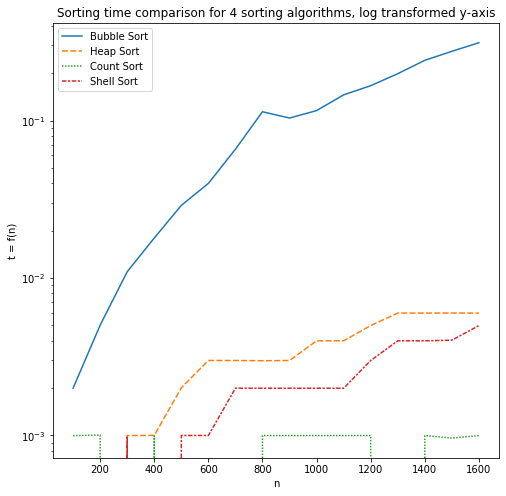

In [65]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_df)
plt.yscale('log')
plt.title('Sorting time comparison for 4 sorting algorithms, log transformed y-axis')
plt.xlabel('n')
plt.ylabel('t = f(n)')

## Exercise I.2
II.1.For different input types compare the effectiveness of 3 sorting algorithms.
a)QS with middle selected pivot, b) HS and c) MS. Examine the performance for the following data types of the sequence:
- random (uniform distribution)
- constant value (e.g.equal to 0)
- increasing order (step equal to 1)
- descending order (step equal to 1)
- ascending-descending order (A shape – increase odd numbers - decrease even)
- descending-ascending order (V -shape – decrease odd numbers - increase even

#### Random distribution of data

In [133]:
time_uniform = {}

for n in range(100, 2401, 100):
    uniform_distr=[]
    for j in range(n):
        uniform_distr.append(int(random.uniform(1000)))
        
    quick_uni = copy.deepcopy(uniform_distr)
    heap_uni = copy.deepcopy(uniform_distr)
    merge_ui = copy.deepcopy(uniform_distr)
    
    #quick sort time measurement for random data according to uniform distribution
    start = time.time()
    quicksort(quick_uni)
    end = time.time()
    time_uniform[n] = [end-start]
    
    #heap sort time measurement 
    start = time.time()
    heapSort(heap_uni)
    end = time.time()
    time_uniform[n].append(end-start)
    
    #merge sort time measurement
    start = time.time()
    mergeSort(merge_ui)
    end = time.time()
    time_uniform[n].append(end-start)
    
time_uniform_df = pd.DataFrame.from_dict(orient='index', \
                                 data=time_uniform, columns=['QuickS unif', 'HeapS unif', 'MergeS unif'])
time_uniform_df.head()

,QuickS unif,HeapS unif,MergeS unif
100,0.000981,0.000000,0.000000
200,0.000996,0.000000,0.001023
300,0.001016,0.001003,0.000610
400,0.000000,0.002001,0.000968
500,0.001005,0.001992,0.000994


Text(0.5, 1.0, 'Time comparison on randomly generated data (uniformly distributed)')

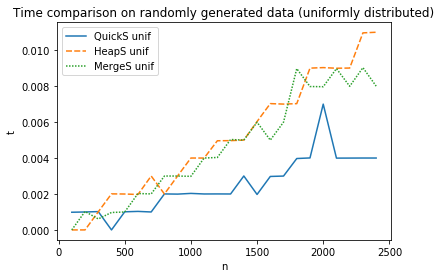

In [134]:
sns.lineplot(data=time_uniform_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title("Time comparison on randomly generated data (uniformly distributed)")

#### Constant value data

In [135]:
time_constant_dic={}

for n in range(100, 2401, 100):
    constant_data=[0 for i in range(n)]
    
    start = time.time()
    quicksort(constant_data)
    end = time.time()
    time_constant_dic[n] = [end-start]
    
    start = time.time()
    heapSort(constant_data)
    end = time.time()
    time_constant_dic[n].append(end-start)
    
    start = time.time()
    mergeSort(constant_data)
    end = time.time()
    time_constant_dic[n].append(end-start)
    
time_constant_df = pd.DataFrame.from_dict(data=time_constant_dic, orient='index', \
                                              columns=['QuickS const', 'HeapS const', 'MergeS const'])
    
time_constant_df.head()

,QuickS const,HeapS const,MergeS const
100,0.000000,0.000000,0.001538
200,0.002010,0.000998,0.000000
300,0.007570,0.000992,0.000000
400,0.011936,0.000000,0.002020
500,0.016954,0.000000,0.001994


Text(0.5, 1.0, 'Time comparison for data with only constant value')

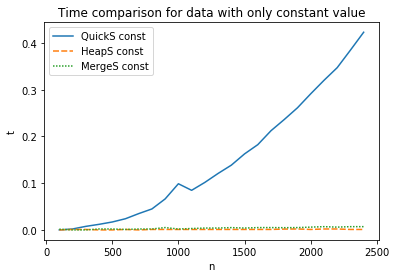

In [136]:
sns.lineplot(data=time_constant_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data with only constant value')

Text(0, 0.5, 't')

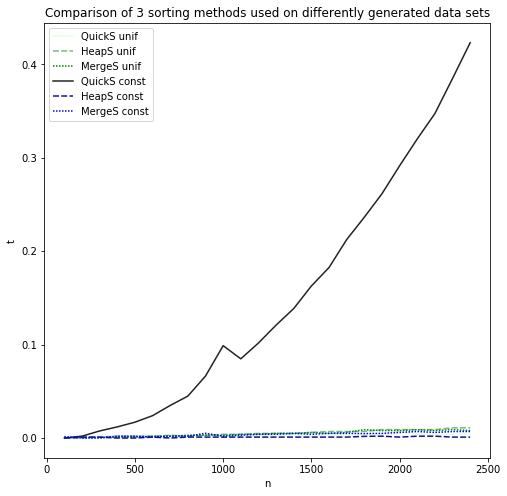

In [137]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_uniform_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_constant_df, style='choice', palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

#### Increasing order

In [138]:
time_increasing_dict={}

for n in range(1000, 16001, 1000):
    
    increasing_rand=[j for j in range(n)]
    
    if n < 2501:
        start = time.time()
        quicksort(increasing_rand)
        end = time.time()
        time_increasing_dict[n] = [end-start]
    else:
        time_increasing_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(increasing_rand)
    end = time.time()
    time_increasing_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(increasing_rand)
    end = time.time()
    time_increasing_dict[n].append(end-start)
    
time_increasing_df = pd.DataFrame.from_dict(data=time_increasing_dict, orient='index', \
                                              columns=['QuickS incr', 'HeapS incr', 'MergeS incr'])
    
time_increasing_df.head()

,QuickS incr,HeapS incr,MergeS incr
1000,0.030919,0.003990,0.002991
2000,0.132619,0.018950,0.012966
3000,NaN,0.031916,0.020975
4000,NaN,0.022941,0.011966
5000,NaN,0.025931,0.015958


Text(0.5, 1.0, 'Time comparison for data generated in increasing order with step 1')

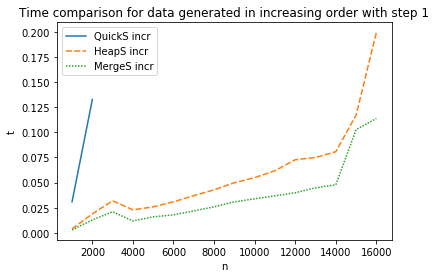

In [139]:
sns.lineplot(data=time_increasing_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data generated in increasing order with step 1')

Python interpreter cannot handle that amount of data due to 'maximum recursion depth exceeded' when using Quick Sort

#### Descending order

In [140]:
time_descending_dict={}

for n in range(1000, 16001, 1000):
    
    descending_rand=[j for j in range(n,1,-1)]
    
    quick_desc = copy.deepcopy(descending_rand)
    heap_desc = copy.deepcopy(descending_rand)
    merge_desc = copy.deepcopy(descending_rand)
    if n < 2500:
        start = time.time()
        quicksort(quick_desc)
        end = time.time()
        time_descending_dict[n] = [end-start]
    else:
        time_descending_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(heap_desc)
    end = time.time()
    time_descending_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(merge_desc)
    end = time.time()
    time_descending_dict[n].append(end-start)
    
time_descending_df = pd.DataFrame.from_dict(data=time_descending_dict, orient='index', \
                                              columns=['QuickS desc', 'HeapS desc', 'MergeS desc'])
    
time_descending_df.head()

,QuickS desc,HeapS desc,MergeS desc
1000,0.063318,0.003989,0.001994
2000,0.258854,0.006980,0.005982
3000,NaN,0.012970,0.008986
4000,NaN,0.016950,0.012965
5000,NaN,0.022905,0.014994


Text(0.5, 1.0, 'Time comparison for data generated in descending order with step -1')

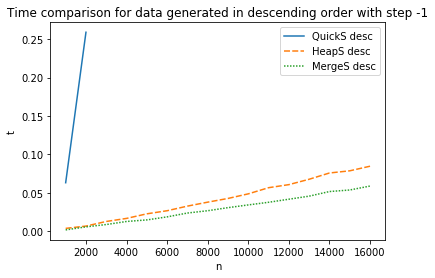

In [141]:
sns.lineplot(data=time_descending_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data generated in descending order with step -1')

Python interpreter cannot handle that amount of data due to 'maximum recursion depth exceeded' when using Quick Sort

Text(0, 0.5, 't')

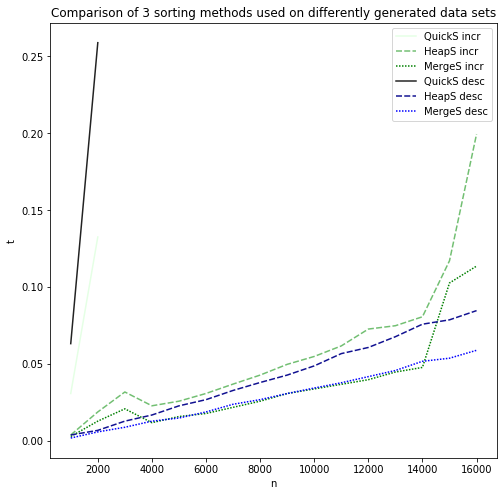

In [142]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_increasing_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_descending_df, palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

#### A-shaped data 

In [143]:
a_shape_dict={}
for n in range(1000, 16001, 1000):
    a_shape=[]
    for j in range(n):
        a_shape.append(j)
        a_shape.append(n-j)
    
    quick_a = copy.deepcopy(a_shape)
    heap_a = copy.deepcopy(a_shape)
    merge_a = copy.deepcopy(a_shape)
    
    if n < 1001:
        start = time.time()
        quicksort(quick_a)
        end = time.time()
        a_shape_dict[n] = [end-start]
    else:
        a_shape_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(heap_a)
    end = time.time()
    a_shape_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(merge_a)
    end = time.time()
    a_shape_dict[n].append(end-start)
    
time_a_shape_df = pd.DataFrame.from_dict(data=a_shape_dict, orient='index', \
                        columns=['QuickS. A_shape', 'HeapS. A_shape', 'MergeS. A_shape'])
time_a_shape_df.head()

,QuickS. A_shape,HeapS. A_shape,MergeS. A_shape
1000,0.199491,0.008992,0.006940
2000,NaN,0.028890,0.023443
3000,NaN,0.030917,0.022938
4000,NaN,0.039893,0.030917
5000,NaN,0.052858,0.038896


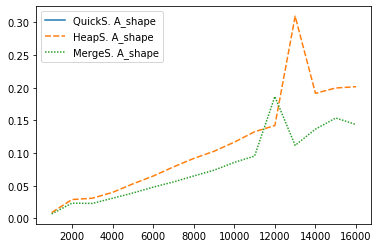

In [144]:
sns.lineplot(data=time_a_shape_df)

#### V-shaped data

In [145]:
v_shape_dict={}
for n in range(1000, 16001, 1000):
    v_shape=[]
    for j in range(n):
        v_shape.append(n-j)
        v_shape.append(j)
    
    quick_v = copy.deepcopy(v_shape)
    heap_v = copy.deepcopy(v_shape)
    merge_v = copy.deepcopy(v_shape)
    
    if n < 1001:
        start = time.time()
        quicksort(quick_v)
        end = time.time()
        v_shape_dict[n] = [end-start]
    else:
        v_shape_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(heap_v)
    end = time.time()
    v_shape_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(merge_v)
    end = time.time()
    v_shape_dict[n].append(end-start)
    
time_v_shape_df = pd.DataFrame.from_dict(data=v_shape_dict, orient='index', \
                        columns=['QuickS. V_shape', 'HeapS. V_shape', 'MergeS. V_shape'])
time_v_shape_df.head()

,QuickS. V_shape,HeapS. V_shape,MergeS. V_shape
1000,0.219891,0.011111,0.007029
2000,NaN,0.024950,0.013948
3000,NaN,0.028929,0.021944
4000,NaN,0.041886,0.029920
5000,NaN,0.054021,0.038895


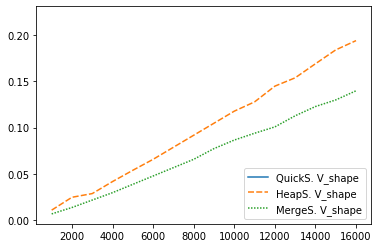

In [146]:
sns.lineplot(data=time_v_shape_df)

Text(0, 0.5, 't')

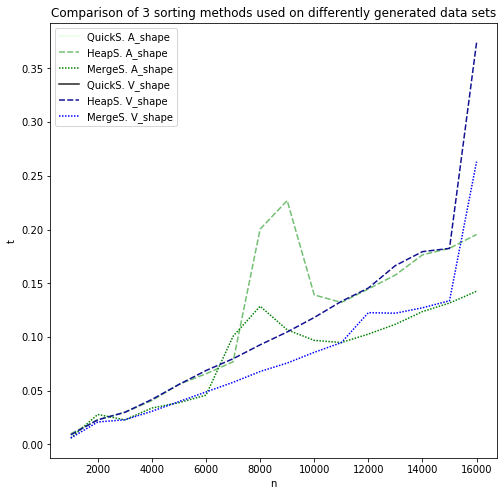

In [108]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_a_shape_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_v_shape_df, palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

### Quick Sort for differently generated data sets

#### Uniformly generated

In [147]:
quick_dict={}
for n in range(1000, 2501, 100):
    quick_uni=[]
    for j in range(n):
        quick_uni.append(int(random.uniform(1000)))
        
    start = time.time()
    quicksort(quick_uni)
    end = time.time()
    quick_dict[n]=[end-start]


#### Constant

In [150]:
for n in range(1000, 2501, 100):
    quick_const=[0 for j in range(n)]
    
    start = time.time()
    quicksort(quick_const)
    end = time.time()
    quick_dict[n].append(end-start)


#### Increasing order

In [151]:
for n in range(1000, 2501, 100):
    quick_incr=[j for j in range(n)]

    start = time.time()
    quicksort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)


#### Decreasing order

In [152]:
for n in range(1000, 2501, 100):
    quick_incr=[j for j in range(n, 0,-1)]

    start = time.time()
    quicksort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)


#### A-shaped

In [154]:
for n in range(1000, 2501, 100):
    quick_a_sh=[]
    for j in range(n):
        quick_a_sh.append(j)
        quick_a_sh.append(n-j)

    start = time.time()
    quicksort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)


#### V-shaped

In [155]:
for n in range(1000, 2501, 100):
    quick_a_sh=[]
    for j in range(n):
        quick_a_sh.append(n-j)
        quick_a_sh.append(j)

    start = time.time()
    quicksort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)

In [156]:
time_quick_df = pd.DataFrame.from_dict(data=quick_dict, orient='index', \
                        columns=['Uniform', 'Constant', 'Increasing', 'Decreasing', 'A shape', 'V shape'])
time_quick_df

AssertionError: 6 columns passed, passed data had 9 columns

Text(0, 0.5, 't')

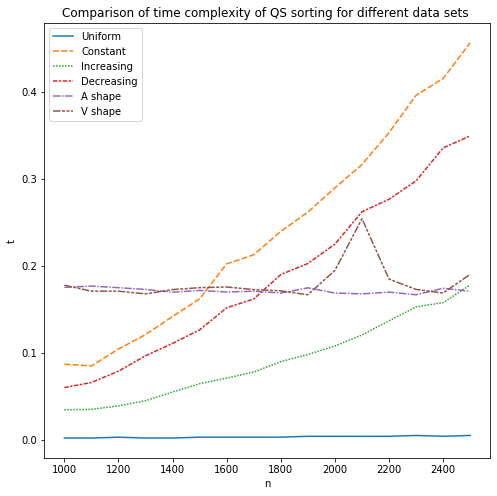

In [126]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_quick_df)
plt.title('Comparison of time complexity of QS sorting for different data sets ')
plt.xlabel('n')
plt.ylabel('t')